In [6]:
import numpy as np
from math import e
from sklearn import tree

In [3]:
X = np.array([[0,1],[1,0],[1,1],[1,0]])
y = np.array([[0],[0],[1],[1]])

In [4]:
def entropy(labels, base=None): # https://gist.github.com/jaradc/eeddf20932c0347928d0da5a09298147
  value, counts = np.unique(labels, return_counts=True)
  norm_counts = counts / counts.sum()
  base = e if base is None else base
  return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

In [7]:
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(133.92000000000002, 181.2, 'X[0] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

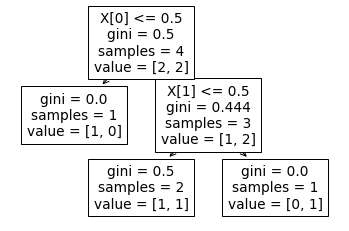

In [8]:
tree.plot_tree(clf) 

In [15]:
X = np.array([
    [1,2,3],
    [1,5,-2],
    [1,3,1]
])
Y = np.array([0.2,0,2])
np.linalg.inv(X.T @ X) @ X.T @ Y

array([35.8, -9.4, -5.6])

In [16]:
theta = np.linalg.inv(X.T @ X) @ X.T @ Y
y_predicted = theta[0] + (theta[1] * 0) + (theta[2] * 1)
y_predicted

30.19999999999105

In [22]:
def y_compute(X1, X2, theta):
    return theta[0] + (theta[1] * X1) + (theta[2] * X2)

In [23]:
error_squared_sum = 0

for x,y in zip(X, Y):
    X1 = x[0]
    X2 = x[1]
    Y_actual = y
    Y_predicted = y_compute(X1, X2, theta)
    error_squared = (Y_actual - Y_predicted)**2
    error_squared_sum += error_squared

mean_error_squared_sum = error_squared_sum / 3
root_mean_error_squared_sum = mean_error_squared_sum**(0.5)
root_mean_error_squared_sum

9.752264694244616